In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/merged_metu_ring.csv')

In [3]:
df.head()

,Gender,Residence,Study_Level,Faculty,Grad_School,Visiting_Faculty_GradSchool,Affiliation_Program,Freq_Taxi,Freq_Ring,Freq_Walking,...,Problem_NotClean,Problem_DriverBehavior,Understanding_Routes,Avg_Wait_Time,UseMore_IfFrequent,App_Helping_Ring,MostValuable_Improvement,Overall_Satisfaction,Open_Comments,Department
0,Male,"East Dorms/Guesthouses (1st Dorm, 2nd Dorm, 16...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Sometimes,Always,...,Often,Always,1.0,11–15 minutes,Yes,5.0,Better route coverage,2.0,The buses should have a much better indication...,Electrical and Electronics Engineering
1,Female,"West Dorms/Guesthouses (Isa Demiray Dormitory,...",Undergraduate (Bachelor’s),Faculty of Arts and Sciences,NaN,NaN,NaN,Rarely,Often,Sometimes,...,Sometimes,Never,3.0,11–15 minutes,Yes,5.0,More frequent buses,4.0,NaN,Psychology
2,Female,"West Dorms/Guesthouses (Isa Demiray Dormitory,...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Always,Always,...,Often,Never,5.0,11–15 minutes,Yes,5.0,Better route coverage,3.0,NaN,Computer Engineering
3,Male,"West Dorms/Guesthouses (Isa Demiray Dormitory,...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Always,Always,...,Never,Never,5.0,5–10 minutes,Yes,2.0,Better route coverage,3.0,The weekday evening busses’ route is overlappi...,Civil Engineering
4,Male,Off-campus (within walking distance),Undergraduate (Bachelor’s),Faculty of Economic and Administrative Sciences,NaN,NaN,NaN,Often,Sometimes,Often,...,Never,Never,2.0,11–15 minutes,Yes,4.0,Better real-time tracking,4.0,NaN,International Relations


In [4]:
df_clean = df[['Overall_Satisfaction', 'Residence']].dropna()

In [5]:
residence_mapping = {
    'East Dorms (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.)': 'East Dorms',
    'West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.)': 'West Dorms',
    'Off-campus (far from campus)': 'Off-campus (Far)',
    'East Dorms/Guesthouses (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.)': 'East Dorms/GH',
    'West Dorms/Guesthouses (Isa Demiray Dormitory, 19th Dorm, etc.)': 'West Dorms/GH',
    'Off-campus (within walking distance)': 'Off-campus (Near)',
    'Off-campus (farther away)': 'Off-campus (Far 2)',
    'Postgraduate Guesthouse': 'Postgrad GH',
    'Postgraduate guesthouse': 'Postgrad GH'
}

In [6]:
df_clean['Residence_Group'] = df_clean['Residence'].map(residence_mapping).fillna(df_clean['Residence'])

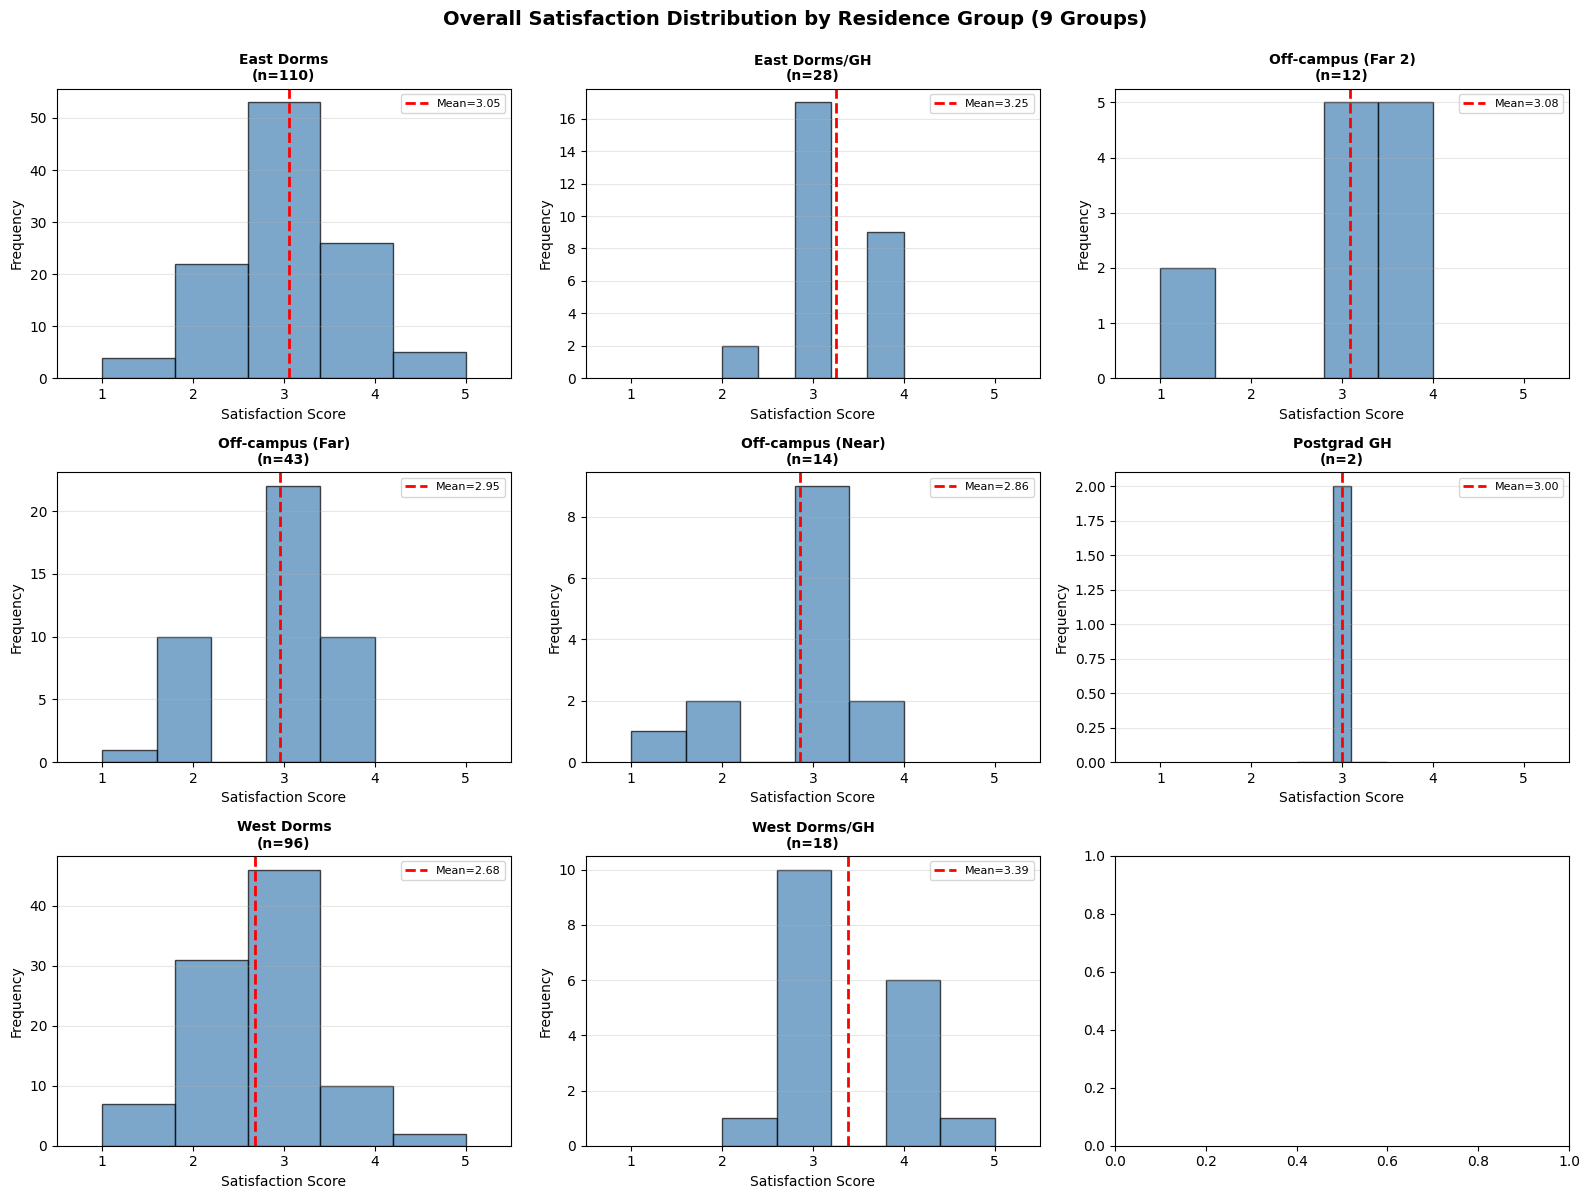

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, residence in enumerate(sorted(df_clean['Residence_Group'].unique())):
    data = df_clean[df_clean['Residence_Group'] == residence]['Overall_Satisfaction']
    axes[idx].hist(data, bins=5, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{residence}\n(n={len(data)})', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Satisfaction Score')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_xlim(0.5, 5.5)
    axes[idx].grid(alpha=0.3, axis='y')
    
    # Add mean line
    mean_val = data.mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean={mean_val:.2f}')
    axes[idx].legend(fontsize=8)

plt.suptitle('Overall Satisfaction Distribution by Residence Group (9 Groups)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

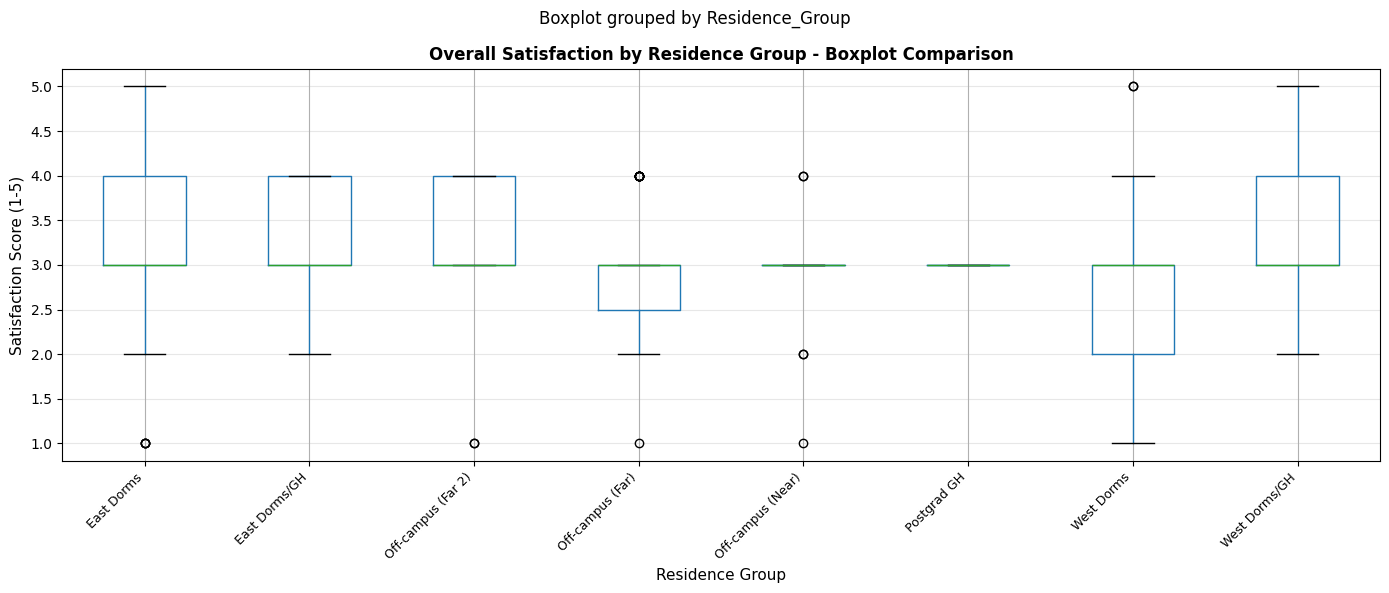

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))

df_clean.boxplot(column='Overall_Satisfaction', by='Residence_Group', ax=ax)
ax.set_title('Overall Satisfaction by Residence Group - Boxplot Comparison', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Residence Group', fontsize=11)
ax.set_ylabel('Satisfaction Score (1-5)', fontsize=11)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=9)
ax.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

let's collapse data in order esace teh sckewness 

In [9]:
collapse_mapping = {
    'East Dorms': 'East Campus',
    'East Dorms/GH': 'East Campus',
    'West Dorms': 'West Campus',
    'West Dorms/GH': 'West Campus',
    'Off-campus (Near)': 'Off-campus',
    'Off-campus (Far)': 'Off-campus',
    'Off-campus (Far 2)': 'Off-campus',
    'Postgrad GH': 'Off-campus'  # Too small, merge with off-campus
}

In [10]:
df_clean['Residence_Collapsed'] = df_clean['Residence_Group'].map(collapse_mapping)

In [11]:
df_clean['Residence_Collapsed'].value_counts()

Residence_Collapsed
East Campus    138
West Campus    114
Off-campus      71
Name: count, dtype: int64

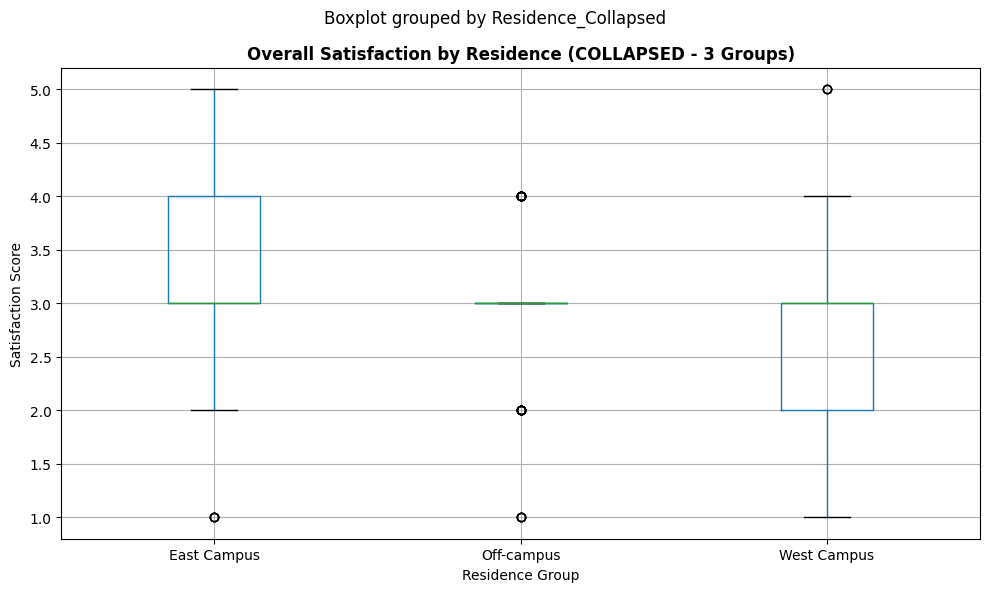

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
df_clean.boxplot(column='Overall_Satisfaction', by='Residence_Collapsed', ax=ax)
ax.set_title('Overall Satisfaction by Residence (COLLAPSED - 3 Groups)', fontweight='bold')
ax.set_xlabel('Residence Group')
ax.set_ylabel('Satisfaction Score')
plt.tight_layout()
plt.show()

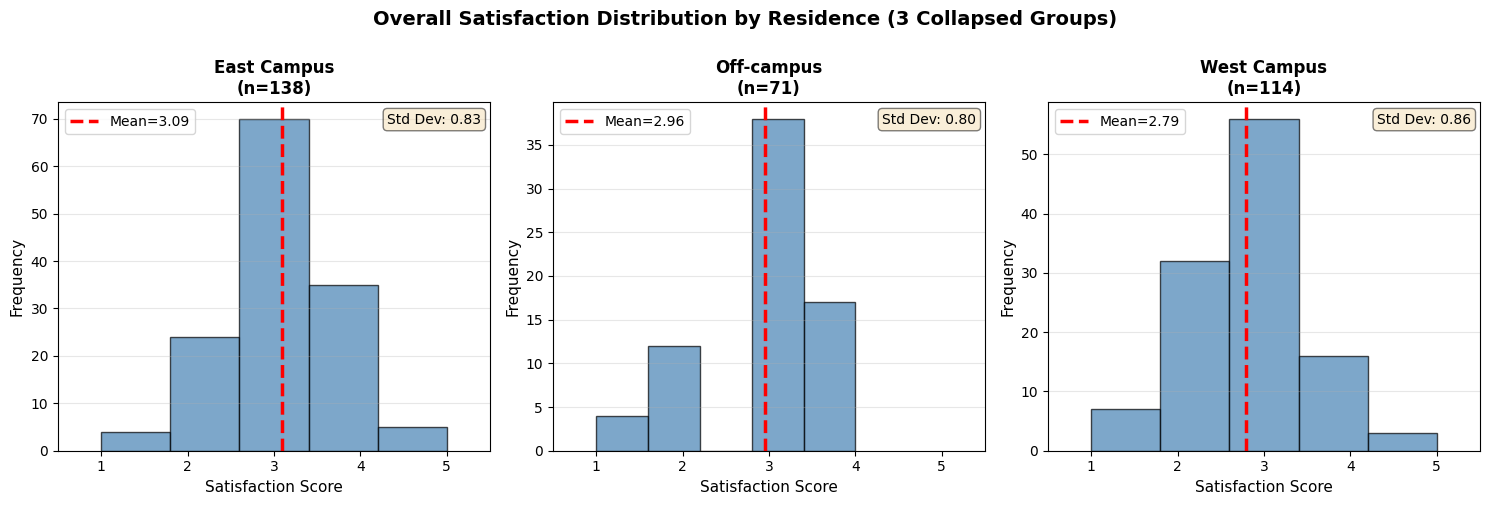


SUMMARY STATISTICS - 3 COLLAPSED GROUPS
                     Count   Mean  Std Dev  Min  Q1 (25%)  Median  Q3 (75%)  Max
Residence_Collapsed                                                             
East Campus            138  3.094    0.827  1.0       3.0     3.0       4.0  5.0
Off-campus              71  2.958    0.801  1.0       3.0     3.0       3.0  4.0
West Campus            114  2.789    0.857  1.0       2.0     3.0       3.0  5.0




In [13]:
# Create histograms for the 3 collapsed groups
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

groups = sorted(df_clean['Residence_Collapsed'].unique())

for idx, group in enumerate(groups):
    data = df_clean[df_clean['Residence_Collapsed'] == group]['Overall_Satisfaction']
    
    axes[idx].hist(data, bins=5, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{group}\n(n={len(data)})', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Satisfaction Score', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_xlim(0.5, 5.5)
    axes[idx].grid(alpha=0.3, axis='y')
    
    # Add mean line
    mean_val = data.mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2.5, label=f'Mean={mean_val:.2f}')
    axes[idx].legend(fontsize=10)
    
    # Add statistics text
    std_val = data.std()
    axes[idx].text(0.98, 0.97, f'Std Dev: {std_val:.2f}', 
                   transform=axes[idx].transAxes, fontsize=10,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Overall Satisfaction Distribution by Residence (3 Collapsed Groups)', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS - 3 COLLAPSED GROUPS")
print("="*80)

summary = df_clean.groupby('Residence_Collapsed')['Overall_Satisfaction'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Q1 (25%)', lambda x: x.quantile(0.25)),
    ('Median', 'median'),
    ('Q3 (75%)', lambda x: x.quantile(0.75)),
    ('Max', 'max')
]).round(3)

print(summary.to_string())
print("\n")

let's recaluclate teh variance w.t.r to new groups and see how it differs from orevious sampling methods

In [15]:
y_col = "Overall_Satisfaction"
df_str_collapsed = df_clean[['Overall_Satisfaction', 'Residence_Collapsed']].dropna()

srs baseline

In [16]:
n_total = len(df_str_collapsed)
y_all = df_str_collapsed[y_col]
S2_total = y_all.var(ddof=1)
var_srs_collapsed = S2_total / n_total
se_srs_collapsed = np.sqrt(var_srs_collapsed)

stratified by 3 groups

In [17]:
grouped = df_str_collapsed.groupby('Residence_Collapsed')
stratum_stats = grouped[y_col].agg(
    n_h='count',
    mean_h='mean',
    var_h='var'
)


In [18]:
N = len(df_str_collapsed)
stratum_stats['W_h'] = stratum_stats['n_h'] / N

var_str_collapsed = np.sum(
    (stratum_stats['W_h']**2) * 
    (stratum_stats['var_h'] / stratum_stats['n_h'])
)
se_str_collapsed = np.sqrt(var_str_collapsed)

In [19]:
efficiency_collapsed = var_srs_collapsed / var_str_collapsed

In [20]:
print("\n" + "="*80)
print("STRATIFIED SAMPLING (3 COLLAPSED GROUPS)")
print("="*80)
print(f"SRS Variance:         {var_srs_collapsed:.6f}")
print(f"Stratified Variance:  {var_str_collapsed:.6f}")
print(f"Efficiency Ratio:     {efficiency_collapsed:.4f}")
print(f"Efficiency Gain:      {(efficiency_collapsed - 1)*100:.2f}%")
print()



STRATIFIED SAMPLING (3 COLLAPSED GROUPS)
SRS Variance:         0.002186
Stratified Variance:  0.002144
Efficiency Ratio:     1.0199
Efficiency Gain:      1.99%



In [21]:
from scipy import stats

In [23]:
for group in df_clean['Residence_Collapsed'].unique():
    data = df_clean[df_clean['Residence_Collapsed'] == group]['Overall_Satisfaction']
    stat, p_value = stats.shapiro(data)
    print(f"{group}: p-value = {p_value:.8f} {'Normal' if p_value > 0.05 else 'Not normal'}")

East Campus: p-value = 0.00000000 Not normal
West Campus: p-value = 0.00000004 Not normal
Off-campus: p-value = 0.00000014 Not normal


In [24]:
from scipy.stats import levene, f_oneway

In [25]:
groups_data = [df_clean[df_clean['Residence_Collapsed'] == g]['Overall_Satisfaction'].dropna().values 
               for g in df_clean['Residence_Collapsed'].unique()]
stat, p_value = levene(*groups_data)

In [27]:
print(f"p-value = {p_value:.4f} {'Groups significantly differ' if p_value < 0.05 else 'Groups similar'}")


p-value = 0.7214 Groups similar


In [28]:
from scipy.stats import kruskal

In [29]:
stat, p_value = kruskal(*groups_data)

In [ ]:
print(f"\nKruskal-Wallis Test (Non-parametric):")
print(f"p-value = {p_value:.4f} {'Groups significantly differ' if p_value < 0.05 else 'Groups similar'}")


Kruskal-Wallis Test (Non-parametric):
p-value = 0.0123 ✓ Groups significantly differ


In [31]:
grand_mean = np.concatenate(groups_data).mean()
ss_between = sum(len(g) * (g.mean() - grand_mean)**2 for g in groups_data)
ss_total = sum((x - grand_mean)**2 for x in np.concatenate(groups_data))
eta_squared = ss_between / ss_total

In [32]:
print(f"\nEffect Size (Eta-squared): {eta_squared:.4f} {'Small' if eta_squared < 0.06 else 'Medium' if eta_squared < 0.14 else 'Large'}")


Effect Size (Eta-squared): 0.0255 Small


ANOVA checks if average satisfaction differs between groups. Result: The 3 groups have similar average satisfaction (all around 2.8-3.1).

Kruskal-Wallis checks if the spread or distribution differs between groups. Result: Even though averages are similar, the way satisfaction is distributed differs slightly (e.g., one group might have more extreme scores).

Effect Size (small) says: Yes, there are differences, but they're small and not super important practically.



# Data Preparation & Sampling Design Decisions

## Decision 1: Why 3 Groups Instead of 9?

**Problem with 9 groups:**
- Some groups too small (n=2 to n=5)
- Small groups = unreliable estimates
- One outlier can skew entire group

**Solution: Collapse to 3 groups**
- East Campus: n=138
- West Campus: n=114
- Off-campus: n=71

**Benefits:**
- ✓ Large, stable sample sizes
- ✓ Similar efficiency gain (~2%)
- ✓ Credible, defensible results

---

## Decision 2: Why NOT Transform Data?

**Why transformations don't work:**
- Likert scales (1-5) are discrete by nature
- Log/sqrt transforms destroy interpretability
- "log(3.5)" has no meaning for satisfaction

**Why raw data is fine:**
- Sample size n≥71 per group is large
- Central Limit Theorem applies to sample means
- Non-normality on Shapiro-Wilk is expected for surveys
- Doesn't invalidate analysis

**Action:**
- ✓ Keep original 1-5 satisfaction scores
- ✓ Use ANOVA + Kruskal-Wallis tests
- ✓ Report both results for robustness

---

## Decision 3: Why NOT Generate More Data?

**You already have enough:**
- Total n=323 respondents
- Per-group minimum: n≥30 ✓
- You have: n=71-138 (2-5x minimum) ✓

**Why generating data is bad:**
- Replaces real survey responses with artificial data
- Creates false precision
- Dishonest approach

**Won't help:**
- More data ≠ larger effect sizes
- Your small effect (η²=0.02) is real
- Only inflates statistical power, not practical meaning

**Action:**
- ✓ Use actual survey data as collected
- ✓ No synthetic data needed
- ✓ Report honestly

---

## Summary: Final Approach

✓ Stratified Sampling by 3 residence groups  
✓ Original Likert Scale data (1-5, no transformation)  
✓ Real Survey Responses (n=323, no synthetic data)  
✓ Both ANOVA & Kruskal-Wallis tests  
✓ Confidence intervals for estimates  

**Next Step:** Conduct final analysis and report results.